## Assignment:

Beat the performance of my Lasso regression by **using different feature engineering steps ONLY!!**.

The performance of my current model, as shown in this notebook is:

- test mse: 1063016789.3316755
- test rmse: 32603.938248801718
- test r2: 0.8453144708738004

To beat my model you will need a test r2 bigger than 0.85 and a rmse smaller than 32603.


=====================================================================================================


### Conditions:

- You MUST NOT change the hyperparameters of the Lasso.
- You MUST use the same seeds in Lasso and train_test_split as I show in this notebook (random_state)
- You MUST use all the features of the dataset (except Id) - you MUST NOT select features


=====================================================================================================


### If you beat my model:

Make a pull request with your notebook to this github repo:
https://github.com/solegalli/udemy-feml-challenge

And add your notebook to the folder:

-StudentsSolutions_v1.0.0

### How to make the PR

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the **fork** button at the top-right

2) clone your forked repo into your local computer:

- Go to www.github.com/yourusername/udemy-feml-challenge
- Click the green button that says clone or download
- copy the url that opens up
- power up a git console
- type: git clone (paste the url you copied from github)
- done

3) Make a copy of the jupyter notebook and add your name:

- Open up the Jupyter notebook called 13-Assignement.ipynb
- Click the "File" button at the top-right and then click "Make a copy"
- **Work your solution in the Copy** and not in the original assignment (otherwise there will be conflicts when making the PR)
- Change the name of the copy of the notebook to: 13-Assignement_yourname.ipynb
- Move the notebook to the folder **StudentsSolutions_v1.0.0**
- done

When you finish, just commit the new notebook to your fork and then make a PR to my repo.

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.


## But i have a notebook ready and I haven't cloned the repo yet, how can I make the PR?

If you worked in the copy you downloaded from Udemy before forking and cloning this repo, then follow this steps:

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the fork button at the top-right

2) clone your forked repo into your local computer:

Go to www.github.com/yourusername/udemy-feml-challenge

- Click the green button that says clone or download
- Copy the url that opens up
- Power up a git console
- Type: git clone (paste the url you copied from github)
- Done

3) Rename your solution as follows and copy it into your cloned repo:

- Rename your solution notebook to: 13-Assignement_yourname.ipynb
- Copy this file into the cloned repo, inside the folder **StudentsSolutions_v1.0.0**
- Done

When you finish, just commit the new notebook to your fork and then make a PR to my repo

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.

**Good luck!!**

## House Prices dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, PowerTransformer
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

### Load Datasets

In [2]:
# load dataset

#data = pd.read_csv('../houseprice.csv')
data = pd.read_csv('houseprice.csv')

In [3]:
# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in year_vars
]

numerical = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in ['Id', 'SalePrice']
    and var not in year_vars
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 18 continuous variables
There are 14 discrete variables
There are 4 temporal variables
There are 43 categorical variables


# Assess normality

In [4]:
# # let's explore the distribution of the numerical variables

# data[numerical].hist(figsize=(20,20))
# plt.show()

In [5]:
# # plot the histograms to have a quick look at the variable distribution
# # histogram and Q-Q plots

# def diagnostic_plots(df, variable):
    
#     # function to plot a histogram and a Q-Q plot
#     # side by side, for a certain variable
    
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     df[variable].hist(bins=30)

#     plt.subplot(1, 2, 2)
#     stats.probplot(df[variable], dist="norm", plot=plt)

#     plt.show()

In [6]:
# # create the transformer
# log_transformer = FunctionTransformer(np.log, validate=True)
# data['field_log'] = np.log(data['field'])

# #reciprocal_transformer = FunctionTransformer(np.reciprocal, validate=True)
# reciprocal_transformer = FunctionTransformer(lambda x: 1/x, validate=True)

# exp_transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True) # can vary exponent as needed
# data['field_exp'] = np.exp(data['field'])

# sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
# data['field_sqrt'] = np.sqrt(data['field'])

# boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
# yj_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# # # find the optimal lambda using the train set - for boxcox transformer
# # boxcox_transformer.fit(data['BsmtUnfSF'].fillna(1).values.reshape(-1,1))
# # # transform the data
# # data['BsmtUnfSF_boxcox'] = boxcox_transformer.transform(data['BsmtUnfSF'].fillna(1).values.reshape(-1,1))
# # diagnostic_plots(data, 'BsmtUnfSF_boxcox')

In [7]:
# diagnostic_plots(data, 'BsmtUnfSF')

In [8]:
data['BsmtUnfSF_sqrt'] = data['BsmtUnfSF'].apply(lambda x: x**0.5)
# diagnostic_plots(data, 'BsmtUnfSF_sqrt')
data.drop('BsmtUnfSF', axis=1, inplace = True)

In [9]:
# diagnostic_plots(data, '1stFlrSF')

In [10]:
data['1stFlrSF_log'] = np.log(data['1stFlrSF'])
# diagnostic_plots(data, '1stFlrSF_log')
data.drop('1stFlrSF', axis=1, inplace = True)

In [11]:
# diagnostic_plots(data, 'GrLivArea')

In [12]:
data['GrLivArea_log'] = np.log(data['GrLivArea'])
# diagnostic_plots(data, 'GrLivArea_log')
data.drop('GrLivArea', axis=1, inplace = True)

In [13]:
# regenerate dtype of each column

categorical = [var for var in data.columns if data[var].dtype == 'O']

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in year_vars
]

numerical = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in ['Id', 'SalePrice']
    and var not in year_vars
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 18 continuous variables
There are 14 discrete variables
There are 4 temporal variables
There are 43 categorical variables


### Separate train and test set

In [14]:
# IMPORTANT: keep the random_state to zero for reproducibility
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.1,
    random_state=0)

In [15]:
# calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [16]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [17]:
def categories_to_mean(df_train, df_test, y_train, y_test):

    # make a temporary copy of the datasets
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()

    for col in categorical:

        # calculate mean target per category
        ordered_labels = df_train_temp.groupby(
            [col])['SalePrice'].mean().to_dict()

        # remap the categories to target mean
        df_train_temp[col] = df_train[col].map(ordered_labels).astype('O')
        df_test_temp[col] = df_test[col].map(ordered_labels).astype('O')

    # remove the target
    df_train_temp.drop(['SalePrice'], axis=1, inplace=True)
    df_test_temp.drop(['SalePrice'], axis=1, inplace=True)

    return df_train_temp, df_test_temp


X_train_mean, X_test_mean = categories_to_mean(
    X_train, X_test, y_train, y_test)

X_train_mean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,BsmtUnfSF_sqrt,1stFlrSF_log,GrLivArea_log
930,20,191356.98166,73.0,8925,181219.432391,NaN,204901.363636,229102.255814,181073.785225,176923.341336,...,NaN,NaN,NaN,0,7,173346.078671,175368.825368,38.078866,7.290293,7.290293
656,20,191356.98166,72.0,10007,181219.432391,NaN,204901.363636,180454.298052,181073.785225,176923.341336,...,NaN,145283.748092,NaN,0,8,173346.078671,175368.825368,15.716234,6.959399,6.959399
45,120,191356.98166,61.0,7658,181219.432391,NaN,164928.283474,180454.298052,181073.785225,176923.341336,...,NaN,NaN,NaN,0,2,173346.078671,175368.825368,36.000000,7.468513,7.468513
1348,20,191356.98166,NaN,16196,181219.432391,NaN,216036.5,205055.882353,181073.785225,176923.341336,...,NaN,NaN,NaN,0,8,173346.078671,175368.825368,6.244998,7.309212,7.309212
55,20,191356.98166,100.0,10175,181219.432391,NaN,204901.363636,180454.298052,181073.785225,176923.341336,...,NaN,NaN,NaN,0,7,173346.078671,175368.825368,30.577770,7.261927,7.261927


In [18]:
# capture the column names for use later in the notebook
final_columns = X_train_mean.columns

## Feature Engineering Pipeline

In [19]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train_mean[discrete] = X_train_mean[discrete].astype('O')
X_test_mean[discrete] = X_test_mean[discrete].astype('O')

In [20]:
house_pipe = Pipeline([

    # missing data imputation - section 4
    ('missing_ind',
     mdi.AddMissingIndicator(
         variables=numerical + ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_num',
     mdi.MeanMedianImputer(
         imputation_method='median',
         variables=numerical + ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_cat', 
     mdi.CategoricalImputer(
        imputation_method='frequent',
        variables=categorical)),

    # categorical encoding - section 6
    ('rare_label_enc',
     ce.RareLabelEncoder(tol=0.01, n_categories=1, variables=discrete)),

    # newly available categorical encoder, uses trees predictions
    ('categorical_enc',
     ce.DecisionTreeEncoder(random_state=2909, variables=discrete)),

    # discretisation - section 8
    ('discretisation',
     dsc.DecisionTreeDiscretiser(random_state=2909, variables=categorical+discrete+numerical)),

    # feature Scaling - section 10
    ('scaler', RobustScaler()),

    # regression
    ('lasso', Lasso(random_state=0))
])

In [21]:
# let's fit the pipeline
house_pipe.fit(X_train_mean, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train_mean)
X_test_preds = house_pipe.predict(X_test_mean)

In [22]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 535667503.47016114
train rmse: 23144.491860271228
train r2: 0.9142085318665213

test mse: 922415503.4497125
test rmse: 30371.294069395735
test r2: 0.8657741517751238


Text(0, 0.5, 'Predicted Price')

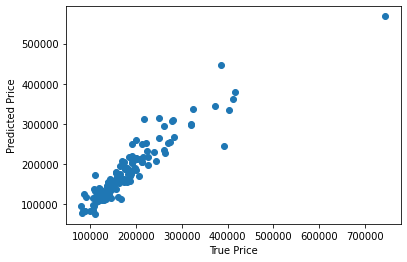

In [23]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

<AxesSubplot:>

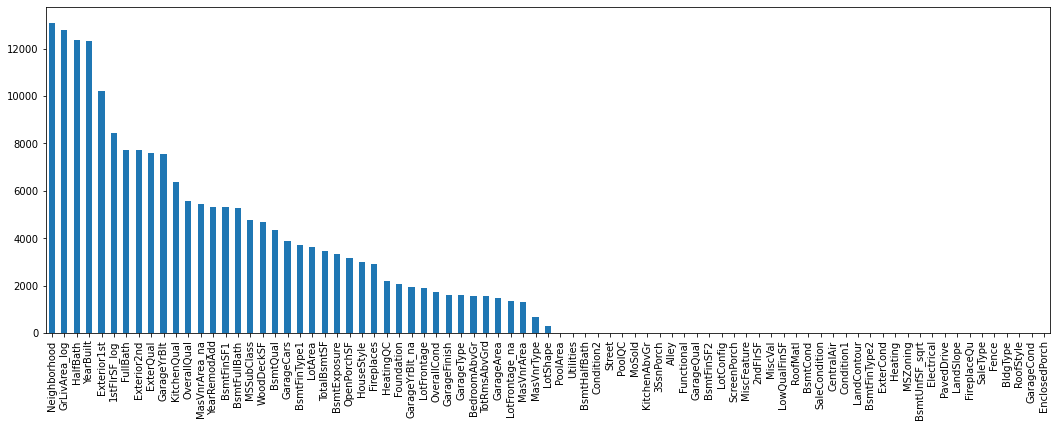

In [24]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))